In [2]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import sympy as sm


In [3]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)

In [4]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-01 00:00:00+02:00,117.721350,117.721350,-27.721350,-27.721350,339.130478,-3.866396
2024-04-01 00:01:00+02:00,117.770858,117.770858,-27.770858,-27.770858,339.406483,-3.866190
2024-04-01 00:02:00+02:00,117.819731,117.819731,-27.819731,-27.819731,339.682757,-3.865984
2024-04-01 00:03:00+02:00,117.867968,117.867968,-27.867968,-27.867968,339.959297,-3.865777
2024-04-01 00:04:00+02:00,117.915566,117.915566,-27.915566,-27.915566,340.236101,-3.865571


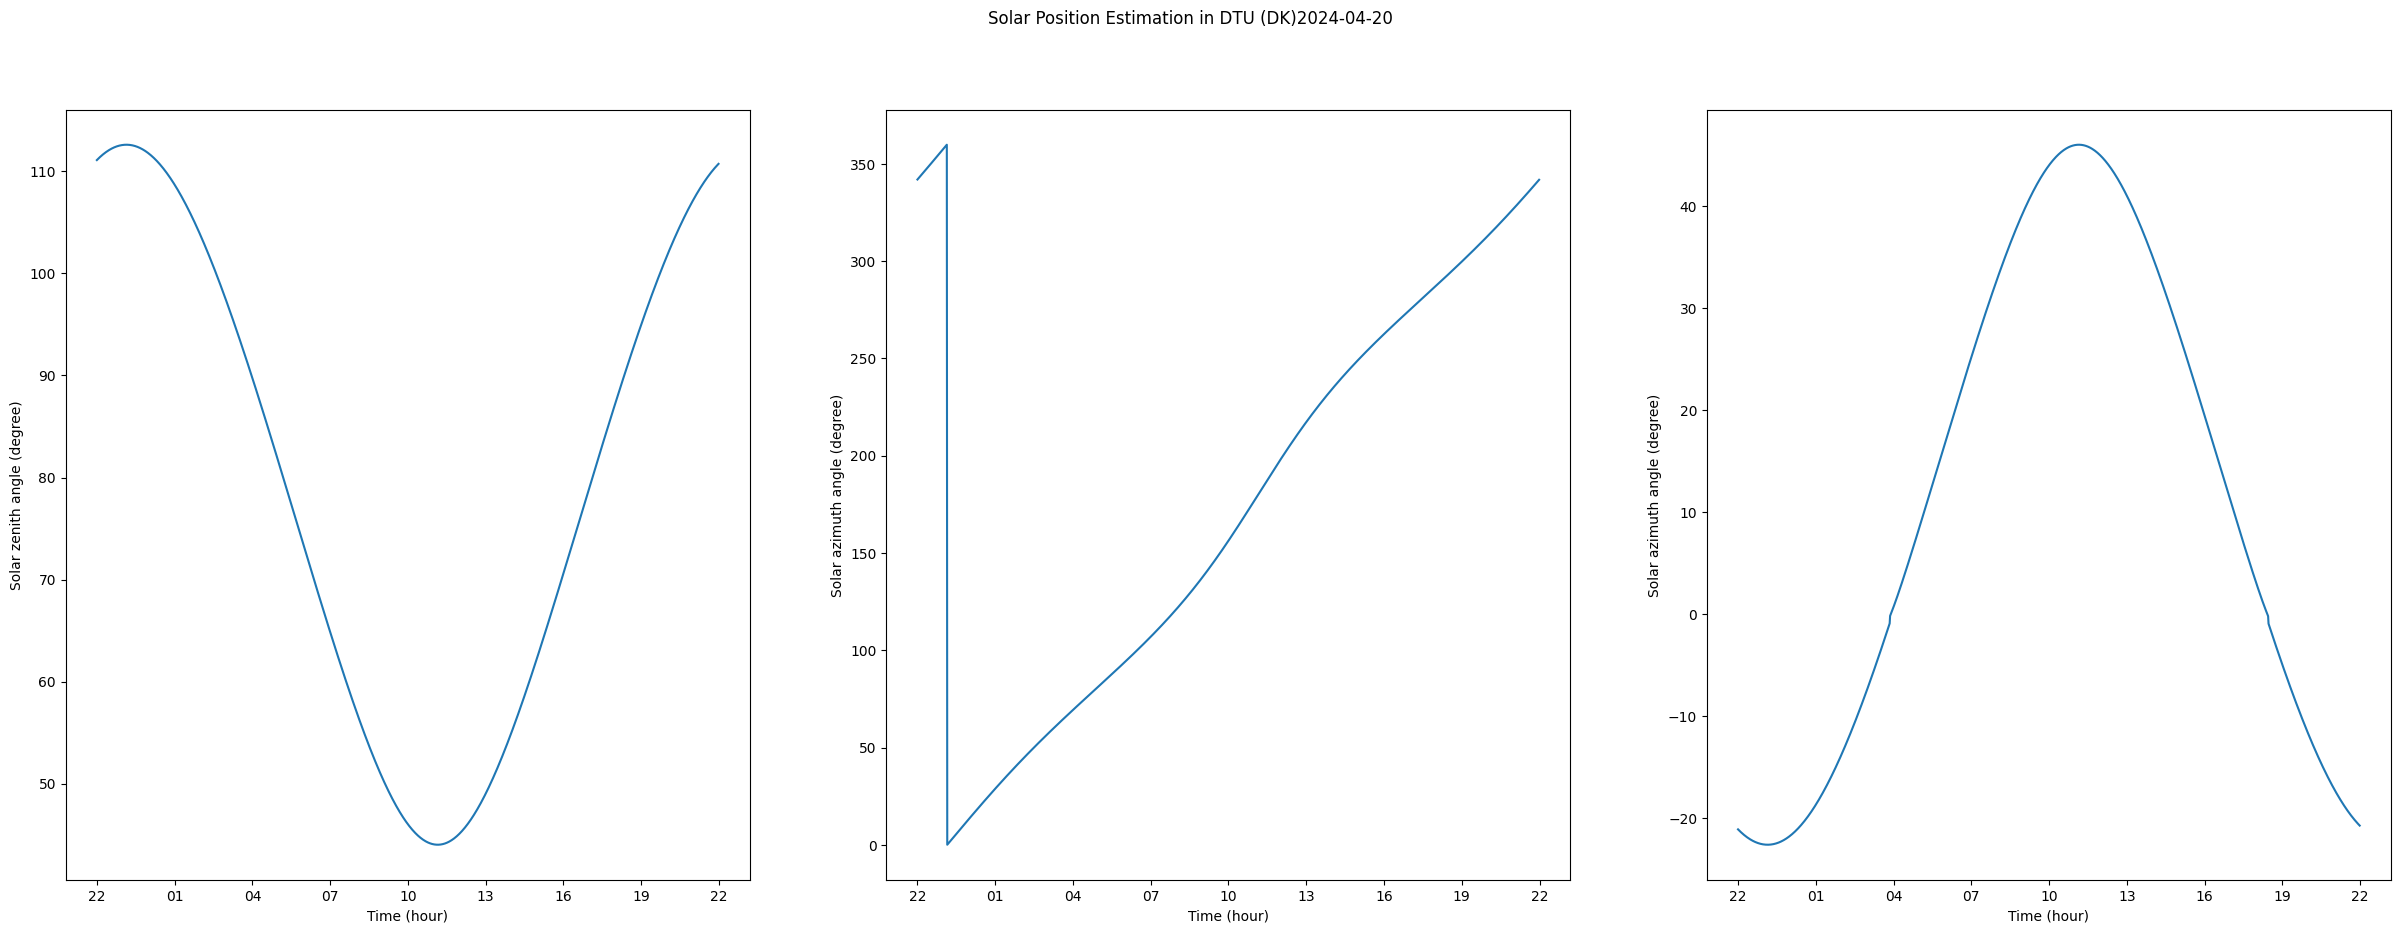

In [5]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min" # "Min", "H",
# Definition of Location object. Coordinates and elevation of
# DTU, Copenhagen (Denmark)
site = Location(
55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
) # latitude, longitude, time_zone, altitude, name
# Definition of a time range of simulation
times = pd.date_range(
start_dato + " 00:00:00", slut_dato + " 23:59:00",
inclusive="left", freq=delta_tid, tz=tidszone
)
# Estimate Solar Position with the ’Location’ object
solpos = site.get_solarposition(times)
# Visualize the resulting DataFrame
solpos.head()
valgt_dato = "2024-04-20"
# Plots for solar zenith, azimuth and elevation angles
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)
# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
# plot for solar elevation angle
ax3.plot(solpos.loc[valgt_dato].apparent_elevation)
ax3.set_ylabel("Solar azimuth angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [22]:
valgt_dato = "2024-04-20"
zenithangs = np.array(solpos.loc[start_dato:slut_dato].zenith)
elevangs = np.array(solpos.loc[start_dato:slut_dato].elevation)
azimuthangs = np.array(solpos.loc[start_dato:slut_dato].azimuth)

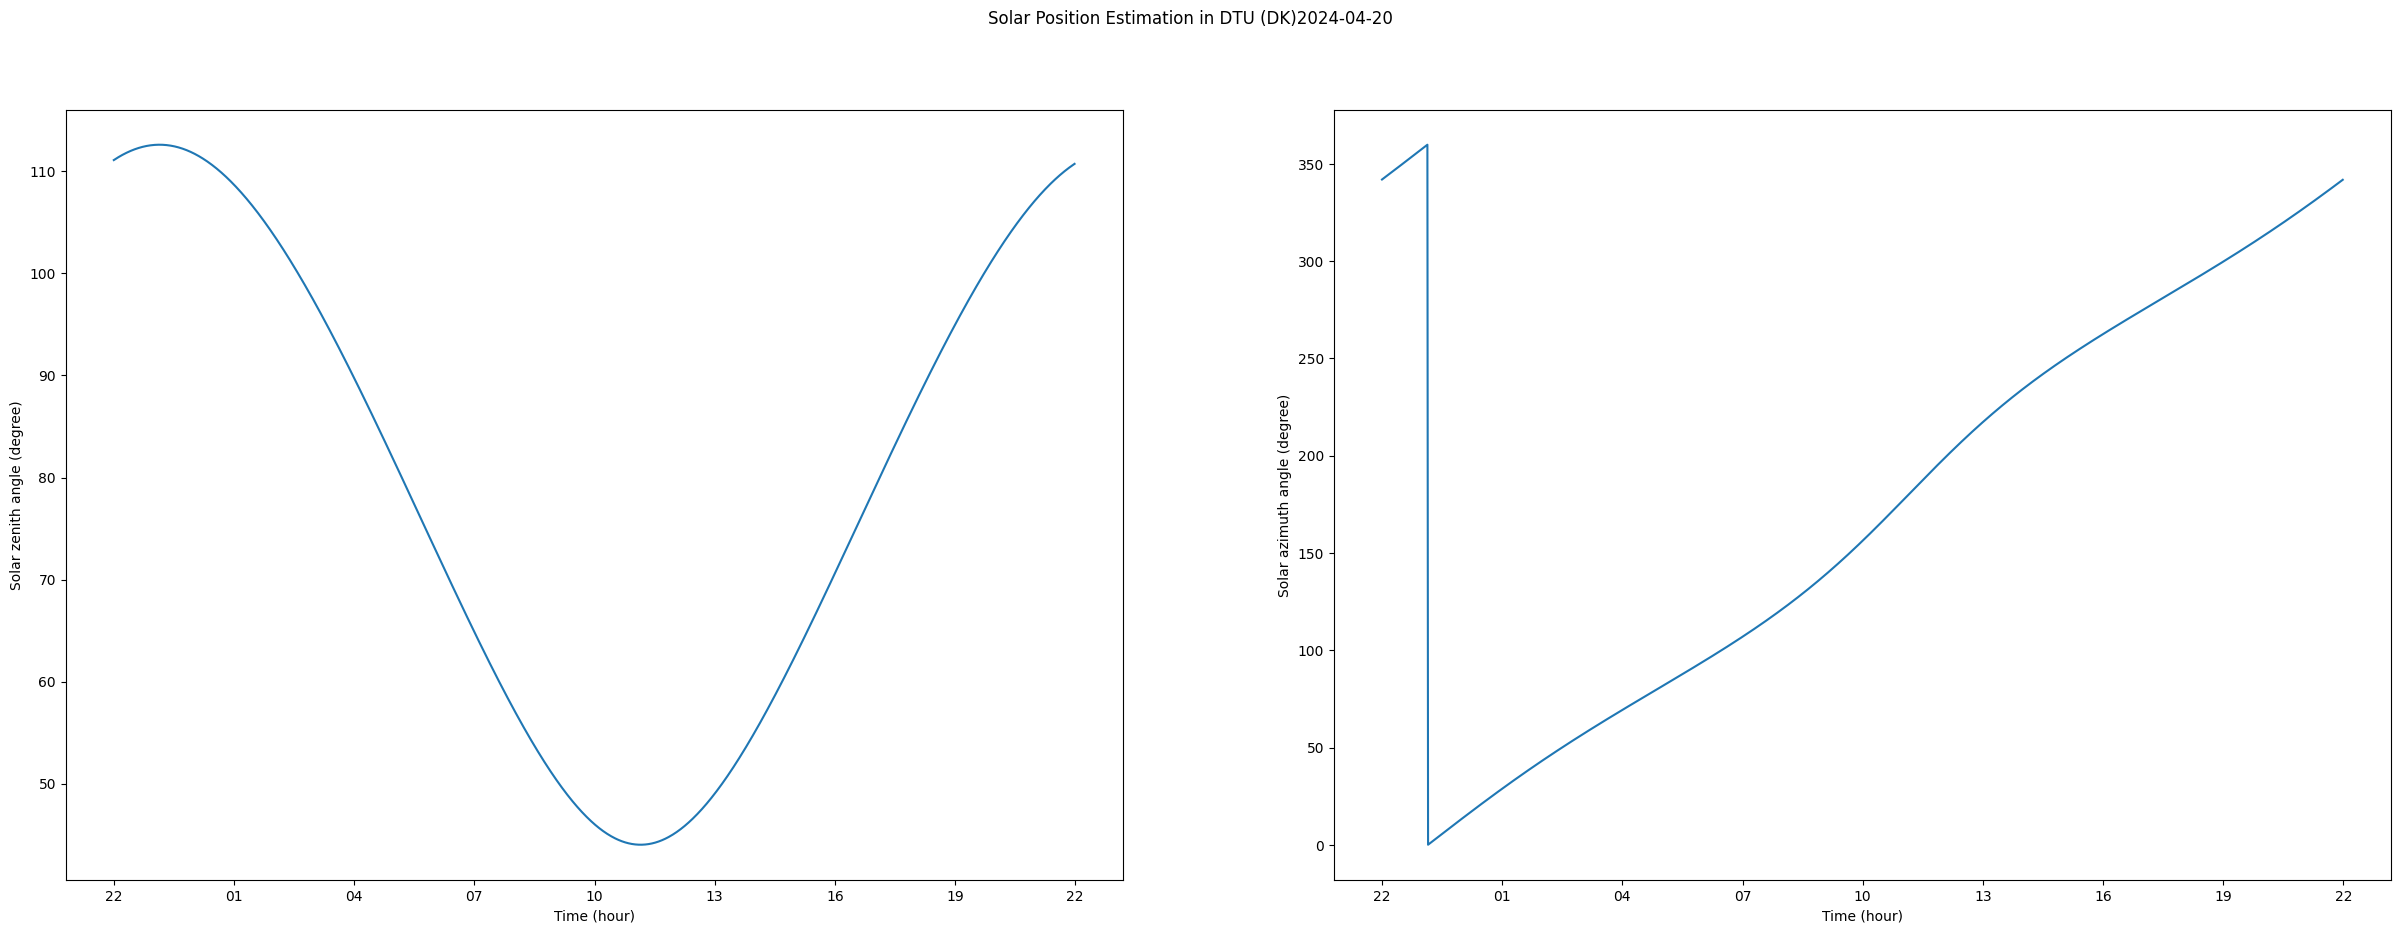

In [8]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

valgt_dato = "2024-04-20"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [40]:
## Max elevation
elevangs = (solpos.loc[valgt_dato].elevation)
for i in range(0,len(elevangs)):
    if (elevangs.iloc[i] == elevangs.max()):
        print("time",solpos.loc[valgt_dato].index[i],"elev:",elevangs.iloc[i])

time 2024-04-20 13:59:00+02:00 elev: 45.9969618762707


In [163]:
## Finder solopgang og solnedgang
positioner = np.array(solpos.loc[valgt_dato].apparent_zenith)
for i in range(0,len(positioner)):
    if (positioner[i] > 89.9) and (positioner[i] < 90.1):
        print("time",solpos.loc[valgt_dato].index[i],"zenith:",positioner[i])

time 2024-04-20 05:53:00+02:00 zenith: 90.07632705456788
time 2024-04-20 05:54:00+02:00 zenith: 89.96780887292519
time 2024-04-20 20:25:00+02:00 zenith: 89.99182360643897
time 2024-04-20 20:26:00+02:00 zenith: 90.09959727604594


In [41]:
# Finder sommersolhverv på dtu
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7861111111, 0, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)
solpos = site.get_solarposition(times)
solpos.head()
elevangs = np.array(solpos.loc[start_dato:slut_dato].apparent_elevation)
for i in range(0,len(elevangs)):
    if (elevangs[i] == elevangs.max()):
        print("time",solpos.loc[start_dato:slut_dato].index[i],"elev:",elevangs[i])

time 2024-06-20 14:02:00+02:00 elev: 57.66098432279944


In [44]:
def findMaxAngleOfSun(date, latitude):
    startDate = date[0:7] + str(int(date[7:8])-1)
    endDate = date[0:7] + str(int(date[7:8])+1)
    site = Location(
    latitude, 0, tidszone, 10, "Not set"
    )
    times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
    )   
    solpos = site.get_solarposition(times)
    solpos.head()
    elevangs = np.array(solpos.loc[start_dato:slut_dato].apparent_elevation)
    for i in range(0,len(elevangs)):
        if (elevangs[i] == elevangs.max()):
            print("time",solpos.loc[start_dato:slut_dato].index[i],"elev:",elevangs[i])
    
findMaxAngleOfSun("02-01-12", 12)

time 2024-08-21 14:03:00+02:00 elev: 89.84866638292404


In [12]:
def positionOfSunAngleToXYZ(theta_s, phi_s, date, time1, time2):
    tidszone = "Europe/Copenhagen"
    delta_tid = "Min"  # "Min", "H",

    # Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
    site = Location(
        55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
    )  # latitude, longitude, time_zone, altitude, name

    # Definition of a time range of simulation
    times = pd.date_range(
        date +" "+time1, date+ " "+time2 ,inclusive="left", freq=delta_tid, tz=tidszone
    )
    solDist = pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700
    return np.array([
                    solDist * np.sin(np.deg2rad(theta_s)) * np.cos((np.deg2rad(phi_s))),
                    solDist * np.sin((np.deg2rad(theta_s))) * np.sin(np.deg2rad(phi_s)),
                    solDist * np.cos(np.deg2rad(theta_s))
                   ])

def positionOfSunXyzToAngle(y,z, date, time1, time2):
    tidszone = "Europe/Copenhagen"
    delta_tid = "Min"  # "Min", "H",

    # Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
    site = Location(
        55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
    )  # latitude, longitude, time_zone, altitude, name

    # Definition of a time range of simulation
    times = pd.date_range(
        date +" "+time1, date+ " "+time2 ,inclusive="left", freq=delta_tid, tz=tidszone
    )
    solDist = pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700
    theta_s = np.arccos((z)/(solDist))
    phi_s = np.arcsin((y)/(((solDist) * np.sin(theta_s))))
    theta_s = np.rad2deg(theta_s.iat[0])
    phi_s = np.rad2deg(phi_s.iat[0])
    if((phi_s < 0.0)):
        phi_s = 360 + (phi_s)
    else:
        phi_s = phi_s
    return theta_s, phi_s

In [13]:
xyzpos = positionOfSunAngleToXYZ(117.721350,339.130478, "2024-04-20", "12:00:00", "12:00:01")
print(xyzpos)
positionOfSunXyzToAngle(xyzpos[1],xyzpos[2], "2024-04-20", "12:00:00", "12:00:01")

[[ 1.24323388e+11]
 [-4.73987246e+10]
 [-6.99173343e+10]]


(117.72135, 339.130478)

In [90]:
360-20.869522

339.130478

In [14]:
import matplotlib.dates as mdates

valgt_dato = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

NameError: name 'plt' is not defined